# 1.Bike Details EDA and Question Answers




In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = "BIKE DETAILS.csv"
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nInfo:")
print(df.info())

print("\nSummary statistics for numeric columns:")
print(df.describe())


Dataset shape: (1061, 7)

First 5 rows:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 n

In [4]:

print("\n1. What is the range of selling prices in the dataset")
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"Answer: Selling price ranges from {min_price} to {max_price}")

min_price,max_price


1. What is the range of selling prices in the dataset
Answer: Selling price ranges from 5000 to 760000


(5000, 760000)

In [5]:

print("\n2. What is the median selling price for bikes in the dataset")
median_price = df['selling_price'].median()
print(f"Answer: Median selling price is {median_price}")
median_price



2. What is the median selling price for bikes in the dataset
Answer: Median selling price is 45000.0


45000.0

In [6]:

print("\n3. What is the most common seller type")
seller_counts = df['seller_type'].value_counts()
most_common_seller_type = seller_counts.idxmax()
most_common_count = seller_counts.max()

print("Most common seller type:", most_common_seller_type)




3. What is the most common seller type
Most common seller type: Individual


In [7]:

print("\n4. How many bikes have driven more than 50,000 kilometers")
count_over_50k = (df['km_driven'] > 50000).sum()
print(f"Answer: {count_over_50k} bikes have driven more than 50,000 km")
print(count_over_50k)


4. How many bikes have driven more than 50,000 kilometers
Answer: 170 bikes have driven more than 50,000 km
170


In [8]:

print("\n5. What is the average km_driven value for each ownership type")
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)
print("Answer: Average km_driven by ownership type:")
print(avg_km_by_owner)



5. What is the average km_driven value for each ownership type
Answer: Average km_driven by ownership type:
owner
4th owner    311500.000000
2nd owner     39288.991870
3rd owner     33292.181818
1st owner     32816.583333
Name: km_driven, dtype: float64


In [9]:

print("\n6. What proportion of bikes are from the year 2015 or older")
condition = df['year'] <= 2015
count_2015_or_older = condition.sum()
total_bikes = len(df)
proportion_2015_or_older = count_2015_or_older / total_bikes
print(f"Answer: {count_2015_or_older} out of {total_bikes} bikes are from 2015 or older")
print(f"Proportion: {proportion_2015_or_older:.2%}")



6. What proportion of bikes are from the year 2015 or older
Answer: 601 out of 1061 bikes are from 2015 or older
Proportion: 56.64%



7. What is the trend of missing values across the dataset
Answer: Missing values summary (count and percentage):
                   missing_count  missing_percent
name                           0         0.000000
selling_price                  0         0.000000
year                           0         0.000000
seller_type                    0         0.000000
owner                          0         0.000000
km_driven                      0         0.000000
ex_showroom_price            435        40.999057


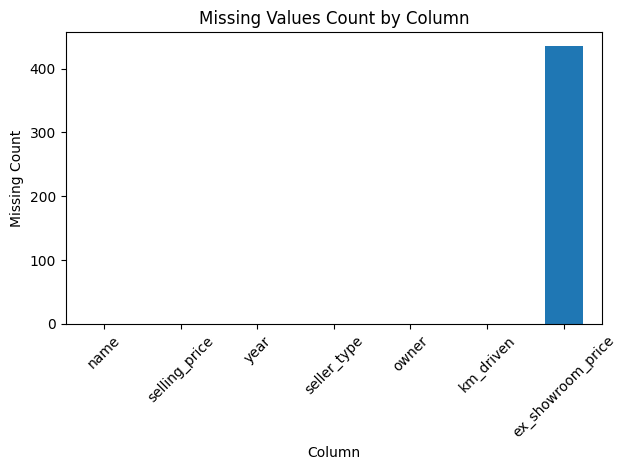

In [10]:

print("\n7. What is the trend of missing values across the dataset")
missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
})
print("Answer: Missing values summary (count and percentage):")
print(missing_summary)

# Bar plot for missing values
plt.figure()
missing_counts.plot(kind='bar')
plt.title('Missing Values Count by Column')
plt.xlabel('Column')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:

print("\n8. What is the highest ex_showroom_price recorded, and for which bike")
max_ex_showroom = df['ex_showroom_price'].max()
row_max_ex = df.loc[df['ex_showroom_price'].idxmax()]
print(f"Answer: Highest ex_showroom_price is {max_ex_showroom}")
print("Bike details for this price:")
print(row_max_ex[['name', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']])



8. What is the highest ex_showroom_price recorded, and for which bike
Answer: Highest ex_showroom_price is 1278000.0
Bike details for this price:
name                 Harley-Davidson Street Bob
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [12]:

print("\n9. What is the total number of bikes listed by each seller type")
seller_counts = df['seller_type'].value_counts()
print("Answer: Total bikes by seller type:")
print(seller_counts)



9. What is the total number of bikes listed by each seller type
Answer: Total bikes by seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64



10. What is the relationship between selling_price and km_driven for first-owner bikes
Number of first-owner bikes: 924
Answer: Visualizing relationship with a scatter plot.


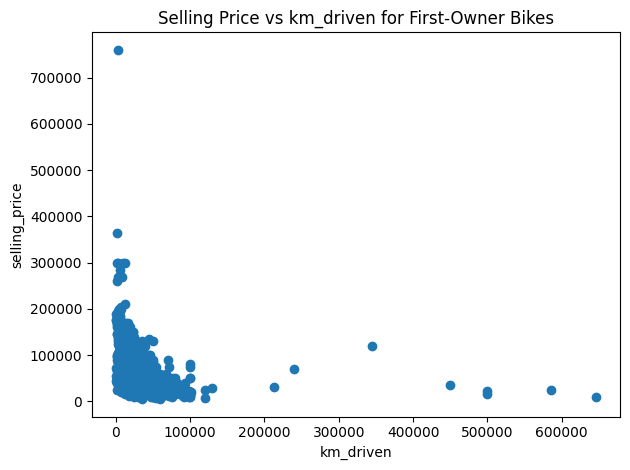

In [15]:

print("\n10. What is the relationship between selling_price and km_driven for first-owner bikes")
first_owner_mask = df['owner'].str.lower().str.contains('1st')
df_first_owner = df[first_owner_mask].copy()
print(f"Number of first-owner bikes: {len(df_first_owner)}")
print("Answer: Visualizing relationship with a scatter plot.")

plt.figure()
plt.scatter(df_first_owner['km_driven'], df_first_owner['selling_price'])
plt.title('Selling Price vs km_driven for First-Owner Bikes')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.tight_layout()
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-558159615.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["km_driven"] = df["km_driven"].astype(str).str.replace(",", "").str.extract("(\d+)").astype(float)



10. What is the relationship between selling_price and km_driven for first-owner bikes
-0.2434817484496572


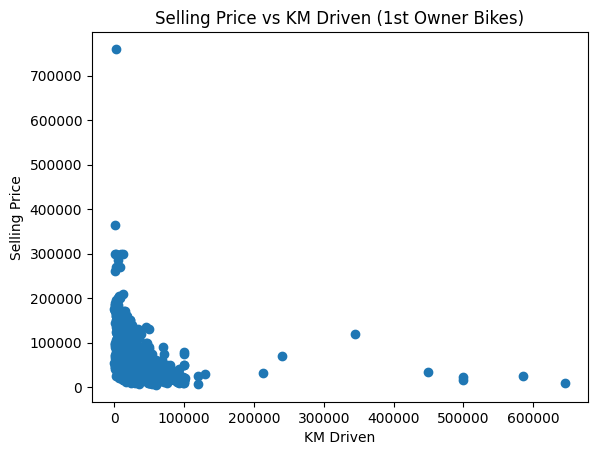

In [18]:

print("\n10. What is the relationship between selling_price and km_driven for first-owner bikes")

import seaborn as sns

df["km_driven"] = df["km_driven"].astype(str).str.replace(",", "").str.extract("(\d+)").astype(float)

# Take only 1st owner bikes
first_owner = df[df["owner"] == "1st owner"]

# Find correlation
print(first_owner["selling_price"].corr(first_owner["km_driven"]))

# Plot
plt.scatter(first_owner["km_driven"], first_owner["selling_price"])
plt.title("Selling Price vs KM Driven (1st Owner Bikes)")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.show()


In [23]:

print("\n11. Identify and remove outliers in the km_driven column using the IQR method")
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

non_outlier_mask = (df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)
df_no_km_outliers = df[non_outlier_mask].copy()

print(f"Answer: Removed {len(df) - len(df_no_km_outliers)} outliers based on km_driven.")
print(f"New dataset shape (no km_driven outliers): {df_no_km_outliers.shape}")



11. Identify and remove outliers in the km_driven column using the IQR method
Q1: 13500.0, Q3: 43000.0, IQR: 29500.0
Lower bound: -30750.0, Upper bound: 87250.0
Answer: Removed 39 outliers based on km_driven.
New dataset shape (no km_driven outliers): (1022, 7)



12. Perform a bivariate analysis to visualize the relationship between year and selling_price
Answer: Visualizing with a scatter plot and average selling price per year.


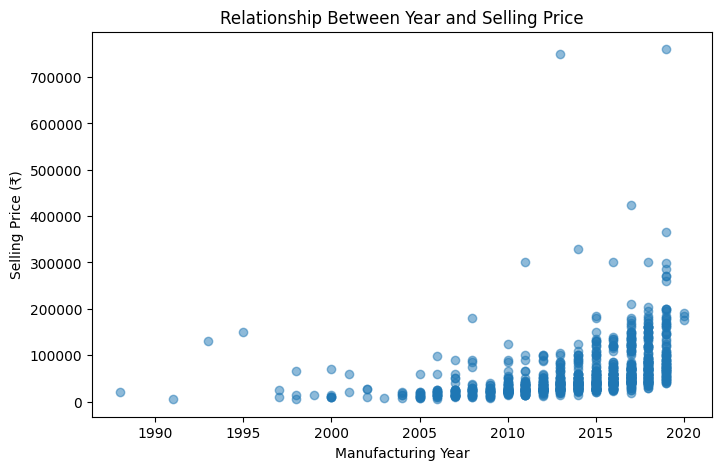

In [26]:

print("\n12. Perform a bivariate analysis to visualize the relationship between year and selling_price")
print("Answer: Visualizing with a scatter plot and average selling price per year.")

plt.figure(figsize=(8,5))
plt.scatter(df["year"], df["selling_price"], alpha=0.5)
plt.title("Relationship Between Year and Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (₹)")
plt.show()





In [29]:

print("\n13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)")
current_year = 2025
df_dep = df.copy()
df_dep = df_dep.dropna(subset=['ex_showroom_price']).copy()
df_dep['age'] = current_year - df_dep['year']
df_dep['depreciation'] = df_dep['ex_showroom_price'] - df_dep['selling_price']

avg_dep_by_age = df_dep.groupby('age')['depreciation'].mean().sort_index()
print("Answer: Average depreciation by bike age (in years):")
print(avg_dep_by_age)



13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
Answer: Average depreciation by bike age (in years):
age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
24    34852.000000
Name: depreciation, dtype: float64


In [5]:
print("\n14. Which bike names are priced significantly above the average price for their manufacturing year")

import pandas as pd

# Re-load the DataFrame to ensure 'df' is defined and consistent with previous transformations
file_path = "BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Apply the km_driven transformation that was done in a previous cell (4p_5RVs8u2t_)
df["km_driven"] = df["km_driven"].astype(str).str.replace(",", "").str.extract("(\\d+)").astype(float)

# Calculate average price per manufacturing year
year_avg = df.groupby("year")["selling_price"].mean()

# Merge avg into original df
df = df.merge(year_avg.rename("avg_price_year"), on="year")

# Condition: selling price > 20% above yearly average
premium_bikes = df[df["selling_price"] > df["avg_price_year"] * 1.20]

print(premium_bikes[["name", "year", "selling_price", "avg_price_year"]])


14. Which bike names are priced significantly above the average price for their manufacturing year
                                      name  year  selling_price  \
0                Royal Enfield Classic 350  2019         175000   
2      Royal Enfield Classic Gunmetal Grey  2018         150000   
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                           Yamaha YZF R3  2019         365000   
17                        Yamaha YZF R15 S  2010          40000   
...                                    ...   ...            ...   
984              Royal Enfield Classic 500  2014          95000   
985              Royal Enfield Classic 500  2011          90000   
1005                    TVS Apache RTR 160  2014          60000   
1008                    Bajaj Pulsar 220 F  2012          52000   
1023                Bajaj Avenger 220 dtsi  2012          45000   

      avg_price_year  
0      119689.511628  
2       87660.374046  
7       34289.285714  
13 


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3849187956.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["km_driven"] = df["km_driven"].astype(str).str.replace(",", "").str.extract("(\d+)").astype(float)


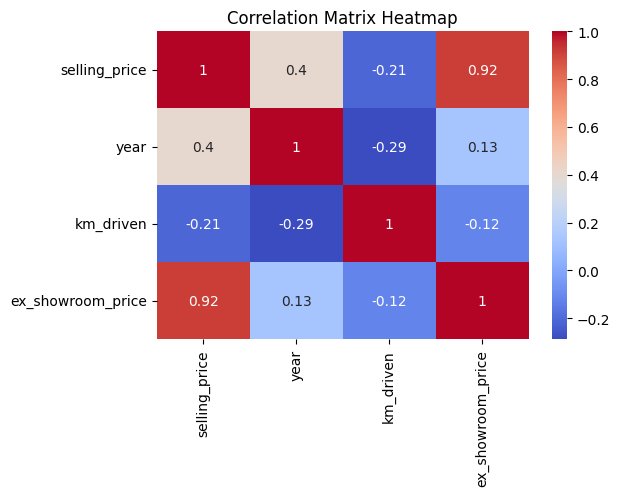

In [10]:

print("\n15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.")


# Convert km_driven to numeric
df["km_driven"] = df["km_driven"].astype(str).str.replace(",", "").str.extract("(\d+)").astype(float)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


## 2.Here is the dataset link:https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view?usp=drive_link


The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

# Car Sales EDA


In [2]:
# Setup: import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (update the path if needed when you upload to Colab)
file_path = '/content/Car Sale.csv'
df = pd.read_csv(file_path)

# Quick peek at the data
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


## Question 1
What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [4]:
# Q1: Average selling price of cars for each dealer
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price per dealer (sorted, highest first):")
display(avg_price_per_dealer)



Average selling price per dealer (sorted, highest first):


,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


## Question 2
Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [5]:
# Q2: Variation in prices by car brand (Company)
brand_stats = df.groupby('Company')['Price ($)'].agg(['count', 'mean', 'std', 'min', 'max'])
brand_stats['price_range'] = brand_stats['max'] - brand_stats['min']
brand_stats_sorted = brand_stats.sort_values('std', ascending=False)

print("Top 10 brands by price standard deviation (variation):")
display(brand_stats_sorted.head(10))

print("\nBrand with highest price variation (by std):")
display(brand_stats_sorted.head(1))

Top 10 brands by price standard deviation (variation):


,count,mean,std,min,max,price_range
Company,,,,,,
Lincoln,492,31407.036585,19658.050211,1700,82500,80800
Saab,210,36516.338095,19653.740089,18000,69980,51980
Cadillac,652,40972.093558,19517.120220,13000,85800,72800
Plymouth,617,29404.980551,19065.997338,9000,75501,66501
Lexus,802,34024.567332,17852.923492,12000,69700,57700
Buick,439,33634.362187,17142.232626,12000,62801,50801
Mercury,874,28535.163616,16445.172195,9000,71990,62990
Nissan,886,27047.511287,16214.264017,9000,75700,66700
Saturn,586,31092.609215,15990.223671,11000,61800,50800



Brand with highest price variation (by std):


,count,mean,std,min,max,price_range
Company,,,,,,
Lincoln,492,31407.036585,19658.050211,1700,82500,80800


## Question 3
What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

Price distribution and IQR by transmission type:


,count,mean,std,min,25%,50%,75%,max,IQR
Transmission,,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0,16500.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0,17000.0


<Figure size 800x600 with 0 Axes>

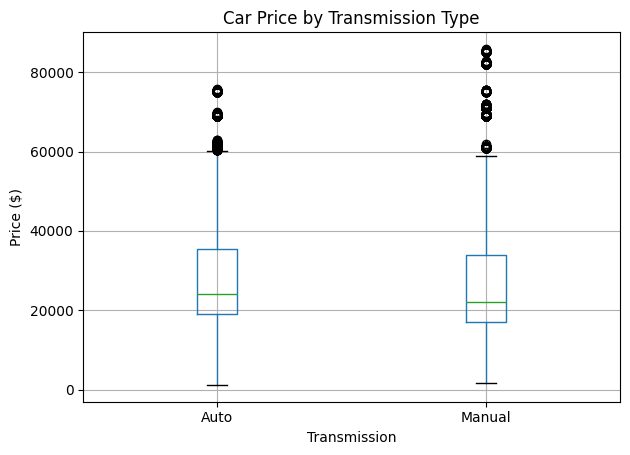

In [6]:
# Q3: Distribution of car prices for each transmission type and IQR
transmission_stats = df.groupby('Transmission')['Price ($)'].describe()
transmission_stats['IQR'] = transmission_stats['75%'] - transmission_stats['25%']
print("Price distribution and IQR by transmission type:")
display(transmission_stats)

# Boxplot of price by transmission type
plt.figure(figsize=(8,6))
df.boxplot(column='Price ($)', by='Transmission')
plt.title('Car Price by Transmission Type')
plt.suptitle('')
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

## Question 4
What is the distribution of car prices across different regions?

Price distribution by region:


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


<Figure size 1000x600 with 0 Axes>

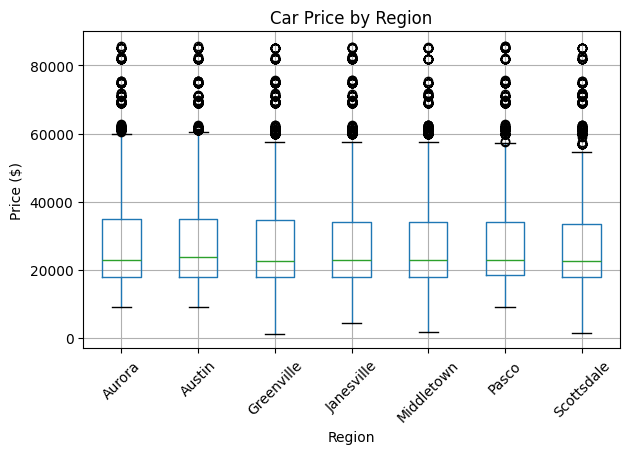

In [7]:
# Q4: Distribution of car prices across different regions
region_price_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
print("Price distribution by region:")
display(region_price_stats)

# Boxplot of prices by region
plt.figure(figsize=(10,6))
df.boxplot(column='Price ($)', by='Dealer_Region')
plt.title('Car Price by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 5
What is the distribution of cars based on body styles?

Car counts by body style:


,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971



Percentage distribution of body styles:


,proportion
Body Style,
SUV,26.662762
Hatchback,25.633732
Sedan,18.773530
Passenger,16.502133
Hardtop,12.427842


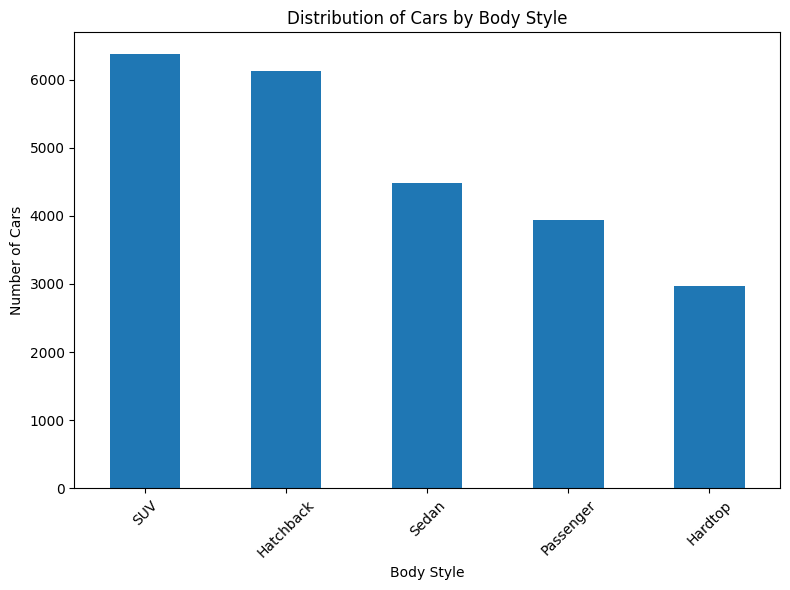

In [10]:
# Q5: Distribution of cars based on body styles
body_counts = df['Body Style'].value_counts()
body_percent = df['Body Style'].value_counts(normalize=True) * 100

print("Car counts by body style:")
display(body_counts)

print("\nPercentage distribution of body styles:")
display(body_percent)

# Bar plot of body style counts
plt.figure(figsize=(8,6))
body_counts.plot(kind='bar')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 6
How does the average selling price of cars vary by customer gender and annual income?

Average price and income by gender:


,avg_price,avg_income,count
Gender,,,
Female,28277.265270,755973.021339,5108
Male,28039.429407,851184.044207,18798


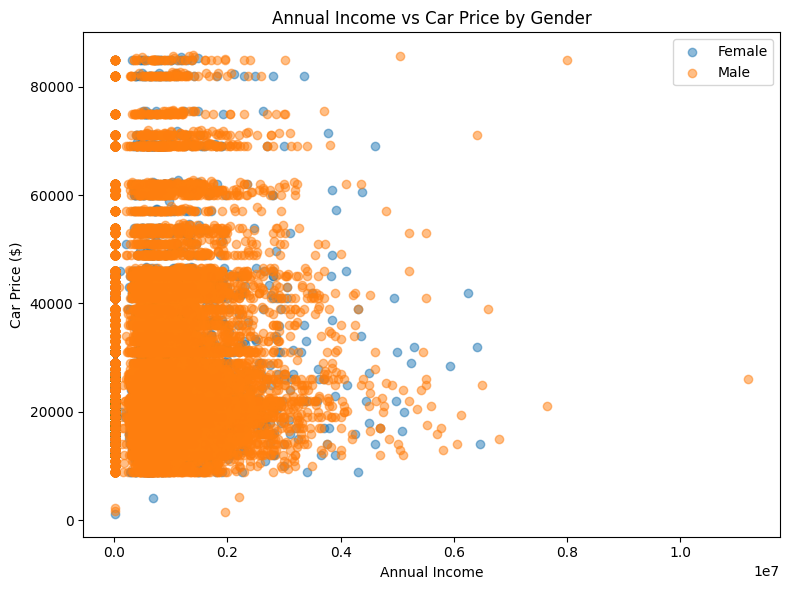

In [11]:
# Q6: Average selling price by customer gender and annual income
# Basic view: group by gender
gender_price_income = df.groupby('Gender').agg(
    avg_price=('Price ($)', 'mean'),
    avg_income=('Annual Income', 'mean'),
    count=('Car_id', 'count')
)
print("Average price and income by gender:")
display(gender_price_income)

# Scatter plot: Annual Income vs Price, colored by Gender
plt.figure(figsize=(8,6))
for gender, subset in df.groupby('Gender'):
    plt.scatter(subset['Annual Income'], subset['Price ($)'], label=gender, alpha=0.5)
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.title('Annual Income vs Car Price by Gender')
plt.legend()
plt.tight_layout()
plt.show()

## Question 7
What is the distribution of car prices by region, and how does the number of cars sold vary by region?

Number of cars sold by region:


,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128



Price distribution by region:


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


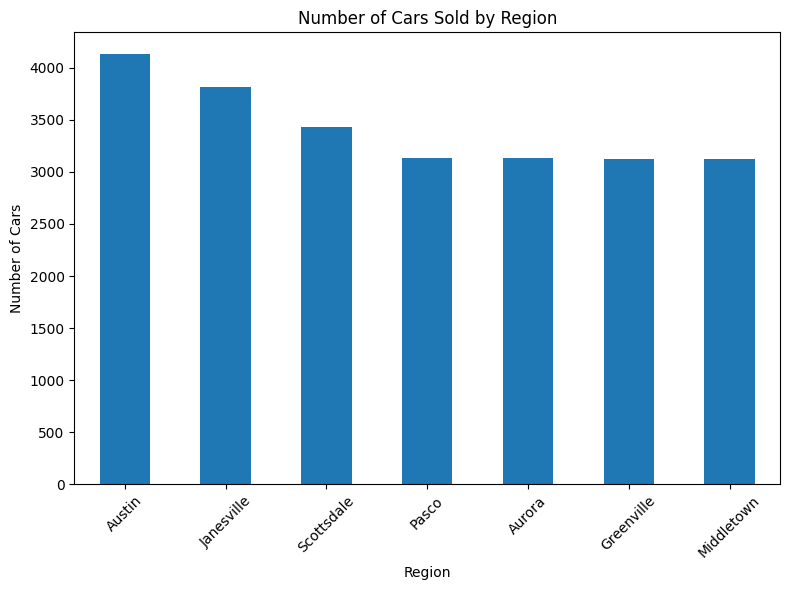

In [12]:
# Q7: Car price distribution and counts by region
region_counts = df['Dealer_Region'].value_counts()
print("Number of cars sold by region:")
display(region_counts)

region_price_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
print("\nPrice distribution by region:")
display(region_price_stats)

# Plot counts by region
plt.figure(figsize=(8,6))
region_counts.plot(kind='bar')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 8
How does the average car price differ between cars with different engine sizes (engine types)?

In [13]:
# Q8: Average car price by engine type
engine_price_stats = df.groupby('Engine')['Price ($)'].agg(['count', 'mean', 'std', 'min', 'max'])
print("Average price by engine type:")
display(engine_price_stats)

Average price by engine type:


,count,mean,std,min,max
Engine,,,,,
DoubleÂ Overhead Camshaft,12571,28248.525972,13747.070597,1200,75700
Overhead Camshaft,11335,27914.710631,15862.871978,1700,85800


## Question 9
How do car prices vary based on the customer’s annual income bracket?

Price distribution by income bracket:


/tmp/ipython-input-2271854016.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_bracket_stats = df.groupby('Income_Bracket')['Price ($)'].describe()


,count,mean,std,min,25%,50%,75%,max
Income_Bracket,,,,,,,,
Very Low,5274.0,27878.018582,14903.506732,1200.0,18000.0,22001.0,34000.0,85001.0
Low,4328.0,28132.007163,14761.631964,9000.0,18000.0,23000.0,35000.0,85500.0
Medium,4774.0,27834.126519,14594.358166,4200.0,18000.0,23000.0,33001.0,85001.0
High,4817.0,28468.153830,15138.070773,9000.0,18500.0,23001.0,34600.0,85600.0
Very High,4713.0,28162.582432,14513.356439,1450.0,18501.0,23000.0,34001.0,85800.0


/tmp/ipython-input-2271854016.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_bracket = df.groupby('Income_Bracket')['Price ($)'].mean()


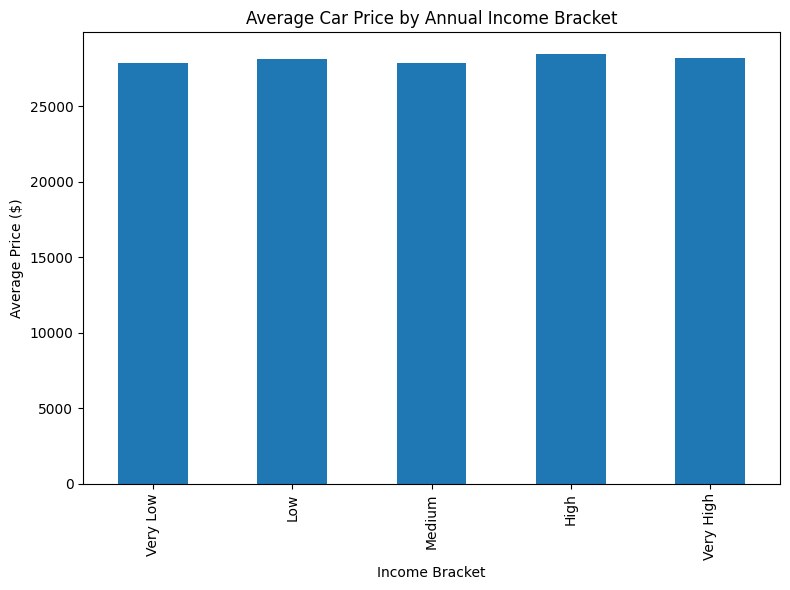

In [14]:
# Q9: Car prices by annual income bracket
# Create income brackets using quantiles
df['Income_Bracket'] = pd.qcut(df['Annual Income'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

income_bracket_stats = df.groupby('Income_Bracket')['Price ($)'].describe()
print("Price distribution by income bracket:")
display(income_bracket_stats)

# Plot average price by income bracket
avg_price_by_bracket = df.groupby('Income_Bracket')['Price ($)'].mean()
plt.figure(figsize=(8,6))
avg_price_by_bracket.plot(kind='bar')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

## Question 10
What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Top 5 car models by sales count:


,count
Model,
Diamante,418
Prizm,411
Silhouette,411
Passat,391
Ram Pickup,383


<Figure size 1000x600 with 0 Axes>

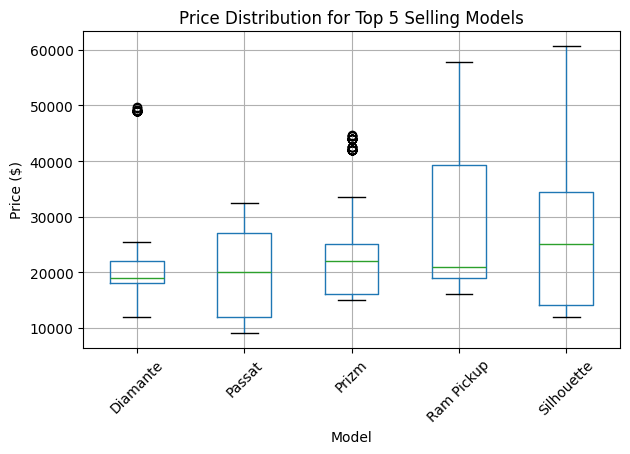

In [15]:
# Q10: Top 5 car models by number of sales and their price distribution
model_counts = df['Model'].value_counts()
top5_models = model_counts.head(5)
print("Top 5 car models by sales count:")
display(top5_models)

top5_df = df[df['Model'].isin(top5_models.index)]

# Boxplot of prices for top 5 models
plt.figure(figsize=(10,6))
top5_df.boxplot(column='Price ($)', by='Model')
plt.title('Price Distribution for Top 5 Selling Models')
plt.suptitle('')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 11
How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [16]:
# Q11: Car price variation by engine type and color
color_engine_stats = df.groupby(['Color', 'Engine'])['Price ($)'].agg(['count', 'mean', 'std', 'min', 'max'])
print("Price stats by color and engine type:")
display(color_engine_stats.head(20))

# Overall price variation by color
color_variation = df.groupby('Color')['Price ($)'].agg(['count', 'mean', 'std', 'min', 'max'])
color_variation['price_range'] = color_variation['max'] - color_variation['min']
print("\nTop 10 colors by price standard deviation (variation):")
display(color_variation.sort_values('std', ascending=False).head(10))

Price stats by color and engine type:


count          mean           std  \
Color      Engine                                                         
Black      DoubleÂ Overhead Camshaft   4172  25766.451103  12418.674126   
           Overhead Camshaft           3685  31732.967164  17457.405345   
Pale White DoubleÂ Overhead Camshaft   5901  30347.987460  14402.413401   
           Overhead Camshaft           5355  24327.767694  13000.103061   
Red        DoubleÂ Overhead Camshaft   2498  27434.392314  13499.354247   
           Overhead Camshaft           2295  30153.405229  17346.642554   

                                        min    max  
Color      Engine                                   
Black      DoubleÂ Overhead Camshaft   1200  61500  
           Overhead Camshaft           1700  85800  
Pale White DoubleÂ Overhead Camshaft   4200  75700  
           Overhead Camshaft          11000  82800  
Red        DoubleÂ Overhead Camshaft   1450  69980  
           Overhead Camshaft          11000  82600


Top 10 colors by price standard deviation (variation):


,count,mean,std,min,max,price_range
Color,,,,,,
Red,4793,28736.319007,15519.360962,1450,82600,81150
Black,7857,28564.798015,15286.065976,1200,85800,84600
Pale White,11256,27483.890370,14077.346859,4200,82800,78600


## Question 12
Is there any seasonal trend in car sales based on the date of sale?

Number of cars sold per month:


/tmp/ipython-input-3804544455.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


,Car_id
Month_Name,
January,790
February,735
March,1535
April,1655
May,1895
June,1715
July,1725
August,1705
September,3305


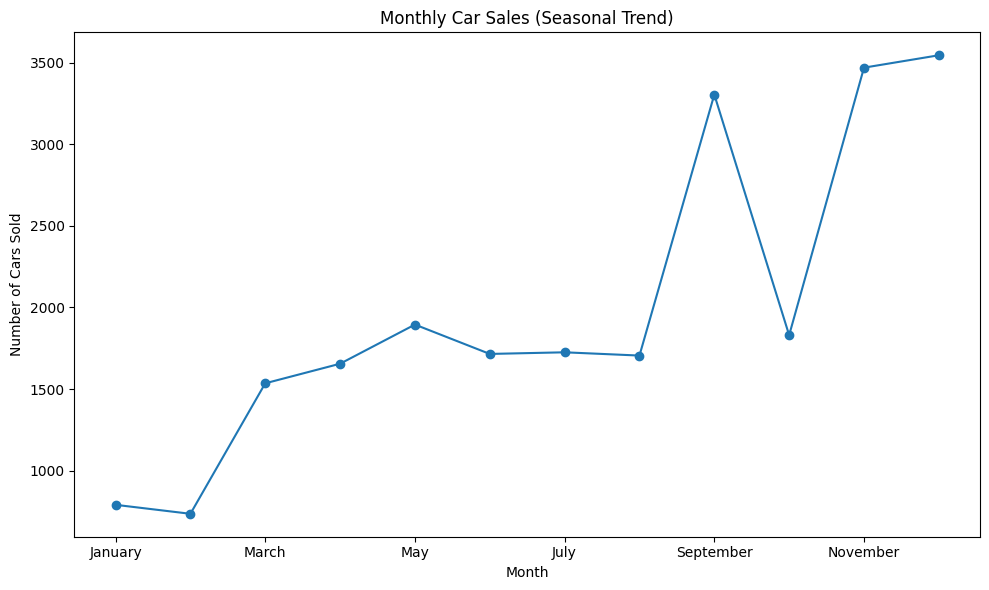

In [17]:
# Q12: Seasonal trends in car sales
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

monthly_sales = df.groupby('Month_Name')['Car_id'].count().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

print("Number of cars sold per month:")
display(monthly_sales)

# Line plot of monthly sales
plt.figure(figsize=(10,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Car Sales (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()

## Question 13
How does the car price distribution change when considering different combinations of body style and transmission type?

Price distribution by Body Style + Transmission combination:


,count,mean,std,min,25%,50%,75%,max
Body_Trans,,,,,,,,
Hardtop / Auto,1408.0,31520.188210,13687.756740,12000.0,21001.0,27000.0,43125.0,75501.0
Hardtop / Manual,1563.0,27016.943698,14072.501848,11000.0,17575.5,22001.0,29000.0,82500.0
Hatchback / Auto,3458.0,25910.544824,13144.014337,4200.0,18001.0,21500.0,31000.0,75700.0
Hatchback / Manual,2670.0,28702.550562,16284.049616,1700.0,17000.0,23000.0,36001.0,85600.0
Passenger / Auto,2020.0,28915.835149,13946.481932,9000.0,19000.0,25000.0,38000.0,69801.0
Passenger / Manual,1925.0,28969.521039,18523.684163,10000.0,16001.0,22000.0,37000.0,85800.0
SUV / Auto,3086.0,27501.404407,13299.927913,1200.0,19000.0,25000.0,33000.0,75501.0
SUV / Manual,3288.0,26079.019161,14621.526541,2200.0,17000.0,22000.0,28000.0,85500.0
Sedan / Auto,2599.0,29955.294344,14310.910860,12000.0,19000.0,26000.0,39500.0,69980.0


<Figure size 1200x600 with 0 Axes>

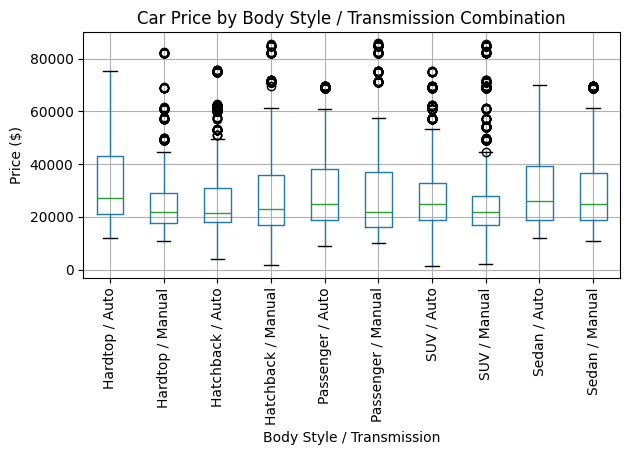

In [18]:
# Q13: Price distribution by body style and transmission combination
df['Body_Trans'] = df['Body Style'] + ' / ' + df['Transmission']

combo_stats = df.groupby('Body_Trans')['Price ($)'].describe()
print("Price distribution by Body Style + Transmission combination:")
display(combo_stats)

# Boxplot for combinations with enough data
counts = df['Body_Trans'].value_counts()
valid_combos = counts[counts > 50].index  # filter to avoid very small groups
subset = df[df['Body_Trans'].isin(valid_combos)]

plt.figure(figsize=(12,6))
subset.boxplot(column='Price ($)', by='Body_Trans')
plt.title('Car Price by Body Style / Transmission Combination')
plt.suptitle('')
plt.xlabel('Body Style / Transmission')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Question 14
What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

Correlation matrix:


,Price ($),Annual Income,Engine_Encoded
Price ($),1.000000,0.012065,-0.011271
Annual Income,0.012065,1.000000,-0.006598
Engine_Encoded,-0.011271,-0.006598,1.000000


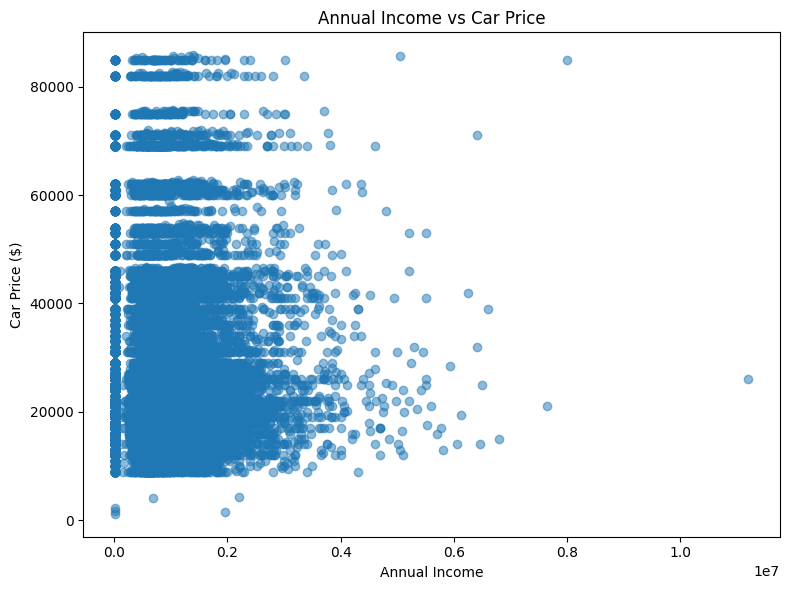

In [19]:
# Q14: Correlation between car price, engine type, and annual income
# Encode engine type as numeric
df['Engine_Encoded'] = df['Engine'].astype('category').cat.codes

corr_cols = ['Price ($)', 'Annual Income', 'Engine_Encoded']
corr_matrix = df[corr_cols].corr()
print("Correlation matrix:")
display(corr_matrix)

# Scatter plot: Annual Income vs Price
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income'], df['Price ($)'], alpha=0.5)
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.title('Annual Income vs Car Price')
plt.tight_layout()
plt.show()

## Question 15
How does the average car price vary across different car models and engine types?

In [20]:
# Q15: Average car price by model and engine type
model_engine_stats = df.groupby(['Model', 'Engine'])['Price ($)'].agg(['count', 'mean', 'std', 'min', 'max'])
print("Average car price by model and engine type (showing first 20 rows):")
display(model_engine_stats.head(20))

# Top 20 (by count) combinations
top_model_engine = model_engine_stats.sort_values('count', ascending=False).head(20)
print("\nTop 20 model/engine combinations by sales count:")
display(top_model_engine)

Average car price by model and engine type (showing first 20 rows):


count          mean           std    min  \
Model   Engine                                                                
3-Sep   DoubleÂ Overhead Camshaft    171  37986.380117  21403.933176  18000   
3000GT  DoubleÂ Overhead Camshaft    156  22764.326923   8455.941265  12000   
        Overhead Camshaft            147  21770.659864   2017.005771  18000   
300M    DoubleÂ Overhead Camshaft    243  21394.888889   4229.419059  16000   
323i    DoubleÂ Overhead Camshaft    223  16744.632287   4867.612734   9000   
        Overhead Camshaft             37  21038.162162    140.052275  21000   
328i    DoubleÂ Overhead Camshaft    127  21069.149606  10936.083663  16000   
        Overhead Camshaft             79  38676.177215  23284.495002  21000   
4Runner DoubleÂ Overhead Camshaft     34  32167.794118   4308.156252  26000   
        Overhead Camshaft             24  25075.416667    208.879603  25000   
5-Sep   DoubleÂ Overhead Camshaft      6  41067.000000    163.626404  41000   
        Overhead Camshaft             33  28071.454545    189.985047  28000   
528i    DoubleÂ Overhead Camshaft    108  46288.712963  15531.595645  31000   
        Overhead Camshaft            216  21197.898148   5313.635549  14000   
A4      DoubleÂ Overhead Camshaft     52  27070.500000    191.744468  27000   
        Overhead Camshaft             50  12046.220000    144.589255  12000   
A6      DoubleÂ Overhead Camshaft    112  25458.258929  10977.853088  14000   
        Overhead Camshaft            217  21220.262673  14305.542657  13000   
A8      Overhead Camshaft             37  33203.756757  15012.592535  13000   
Accent  Overhead Camshaft             35  18129.085714    230.746789  18000   

                                     max  
Model   Engine                            
3-Sep   DoubleÂ Overhead Camshaft  69980  
3000GT  DoubleÂ Overhead Camshaft  39500  
        Overhead Camshaft          24900  
300M    DoubleÂ Overhead Camshaft  26750  
323i    DoubleÂ Overhead Camshaft  22900  
        Overhead Camshaft          21700  
328i    DoubleÂ Overhead Camshaft  62001  
        Overhead Camshaft          69500  
4Runner DoubleÂ Overhead Camshaft  35800  
        Overhead Camshaft          25800  
5-Sep   DoubleÂ Overhead Camshaft  41401  
        Overhead Camshaft          28750  
528i    DoubleÂ Overhead Camshaft  62500  
        Overhead Camshaft          29901  
A4      DoubleÂ Overhead Camshaft  27800  
        Overhead Camshaft          12601  
A6      DoubleÂ Overhead Camshaft  42501  
        Overhead Camshaft          85500  
A8      Overhead Camshaft          44501  
Accent  Overhead Camshaft          18800


Top 20 model/engine combinations by sales count:


,,count,mean,std,min,max
Model,Engine,,,,,
RL,Overhead Camshaft,317,23513.637224,7300.075823,17000,34801
Jetta,DoubleÂ Overhead Camshaft,280,33105.028571,18280.938991,16000,69600
Ram Pickup,Overhead Camshaft,269,19623.472119,2875.774179,16000,34500
Passat,DoubleÂ Overhead Camshaft,260,19730.953846,9011.375550,9000,32501
Silhouette,Overhead Camshaft,258,22327.375969,8074.559705,14000,39000
Prizm,Overhead Camshaft,257,22388.750973,6215.529234,16000,44700
LHS,DoubleÂ Overhead Camshaft,257,21778.396887,3386.197338,16000,26751
300M,DoubleÂ Overhead Camshaft,243,21394.888889,4229.419059,16000,26750
Explorer,DoubleÂ Overhead Camshaft,225,32024.315556,10938.255896,4200,42800


##3.Amazon Products EDA


In [22]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)


df = pd.read_csv('amazon.csv')


print("Shape of data:", df.shape)
df.head()

Shape of data: (1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [24]:
# Basic EDA

# Info about columns
print("=== Data Info ===")
df.info()

print("\n=== Summary Statistics (Numeric-like Columns) ===")
print(df.describe(include='all'))

print("\n=== Missing Values Per Column ===")
print(df.isna().sum())

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   

In [25]:
# Data cleaning & feature engineering

# Helper functions to clean price, percentage and counts
def price_to_float(s):
    if pd.isna(s):
        return np.nan
    return float(str(s).replace('₹', '').replace(',', '').strip())

def pct_to_float(s):
    if pd.isna(s):
        return np.nan
    return float(str(s).replace('%', '').replace(',', '').strip())

def int_from_str(s):
    if pd.isna(s):
        return np.nan
    digits = ''.join(ch for ch in str(s) if ch.isdigit())
    return float(digits) if digits else np.nan

# Create cleaned numeric columns
df['discounted_price_num'] = df['discounted_price'].apply(price_to_float)
df['actual_price_num'] = df['actual_price'].apply(price_to_float)
df['discount_pct_num'] = df['discount_percentage'].apply(pct_to_float)
df['rating_num'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count_num'] = df['rating_count'].apply(int_from_str)

# Extract main (top-level) category
df['main_category'] = df['category'].str.split('|').str[0]

df[['discounted_price_num','actual_price_num','discount_pct_num','rating_num','rating_count_num']].describe()

,discounted_price_num,actual_price_num,discount_pct_num,rating_num,rating_count_num
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


## Q1. What is the average rating for each product category?

In [26]:
# Q1. Average rating for each product category (using main_category)

avg_rating_by_cat = (
    df.groupby('main_category')['rating_num']
      .mean()
      .sort_values(ascending=False)
)

print("Average rating by main category:")
avg_rating_by_cat

Average rating by main category:


,rating_num
main_category,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749
Home&Kitchen,4.040716
Health&PersonalCare,4.000000
MusicalInstruments,3.900000
Car&Motorbike,3.800000


## Q2. What are the top `rating_count` products by category?

In [27]:
# Q2. Top rating_count products by category
# We use rating_count_num (cleaned) and show top 3 per main_category

top_n = 3

top_products_by_cat = (
    df.sort_values('rating_count_num', ascending=False)
      .groupby('main_category')
      .head(top_n)[['main_category', 'product_name', 'rating_num', 'rating_count_num']]
)

top_products_by_cat.reset_index(drop=True)

,main_category,product_name,rating_num,rating_count_num
0,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4.4,426973.0
1,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4.4,426973.0
2,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426973.0
3,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,4.1,270563.0
4,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,4.3,253105.0
5,Computers&Accessories,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...,4.3,189104.0
6,Computers&Accessories,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,4.2,179692.0
7,Home&Kitchen,Pigeon by Stovekraft Amaze Plus Electric Kettl...,3.9,123365.0
8,MusicalInstruments,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,4.0,68664.0
9,Home&Kitchen,"Prestige Electric Kettle PKOSS - 1500watts, St...",3.9,63350.0


## Q3. What is the distribution of discounted prices vs. actual price?

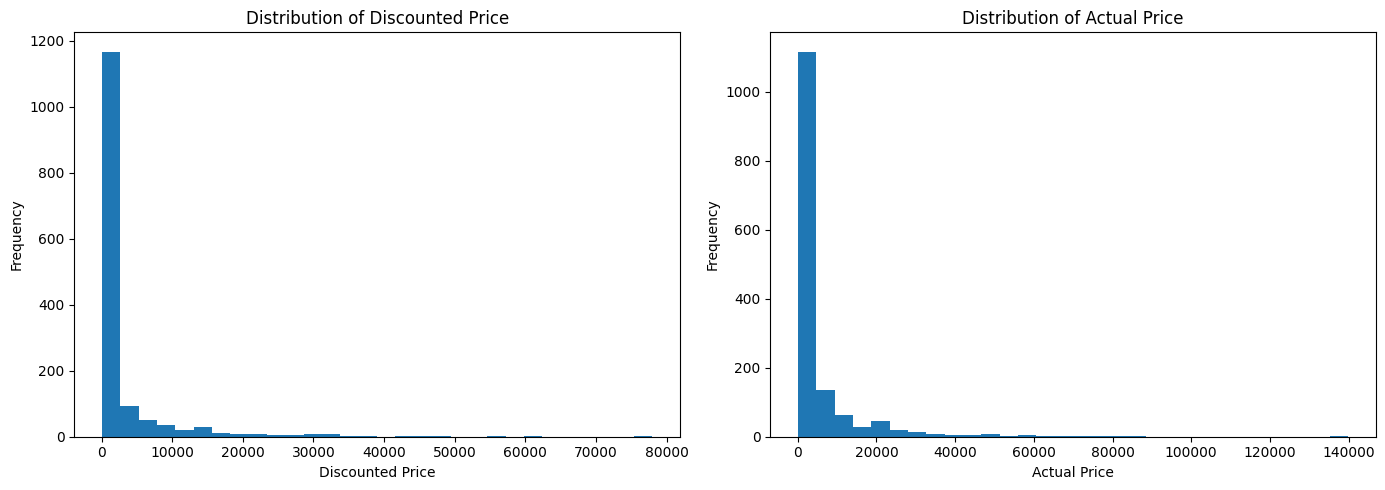

,discounted_price_num,actual_price_num
count,1465.000000,1465.000000
mean,3125.310874,5444.990635
std,6944.304394,10874.826864
min,39.000000,39.000000
25%,325.000000,800.000000
50%,799.000000,1650.000000
75%,1999.000000,4295.000000
max,77990.000000,139900.000000


In [28]:
# Q3. Distribution of discounted prices vs. actual price

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of discounted prices
axes[0].hist(df['discounted_price_num'].dropna(), bins=30)
axes[0].set_title('Distribution of Discounted Price')
axes[0].set_xlabel('Discounted Price')
axes[0].set_ylabel('Frequency')

# Distribution of actual prices
axes[1].hist(df['actual_price_num'].dropna(), bins=30)
axes[1].set_title('Distribution of Actual Price')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Also show a quick comparison table
df[['discounted_price_num', 'actual_price_num']].describe()

## Q4. How does the average discount percentage vary across categories?

Average discount percentage by main category:
main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_pct_num, dtype: float64


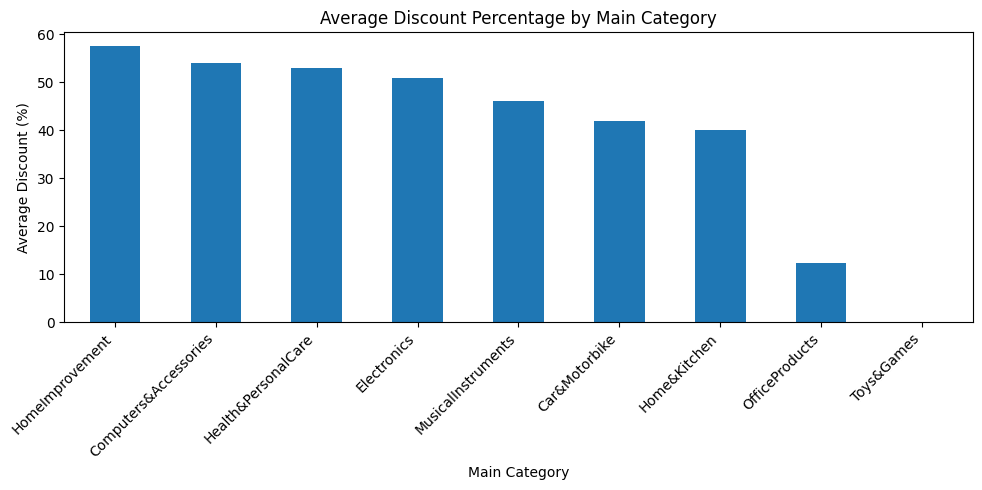

In [29]:
# Q4. Average discount percentage per category (main_category)

avg_discount_by_cat = (
    df.groupby('main_category')['discount_pct_num']
      .mean()
      .sort_values(ascending=False)
)

print("Average discount percentage by main category:")
print(avg_discount_by_cat)

# Bar plot
plt.figure(figsize=(10,5))
avg_discount_by_cat.plot(kind='bar')
plt.title('Average Discount Percentage by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q5. What are the most popular product names?

In [30]:
# Q5. Most popular product names
# "Popular" interpreted as products with highest rating_count_num

top_n = 10
popular_products = (
    df.sort_values('rating_count_num', ascending=False)
      [['product_name', 'main_category', 'rating_num', 'rating_count_num']]
      .drop_duplicates(subset=['product_name'])
      .head(top_n)
)

popular_products.reset_index(drop=True)

,product_name,main_category,rating_num,rating_count_num
0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",Electronics,4.4,426973.0
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",Electronics,4.4,426973.0
2,AmazonBasics Flexible Premium HDMI Cable (Blac...,Electronics,4.4,426973.0
3,boAt Bassheads 100 in Ear Wired Earphones with...,Electronics,4.1,363713.0
4,boAt Bassheads 100 in Ear Wired Earphones with...,Electronics,4.1,363713.0
5,boAt BassHeads 100 in-Ear Wired Headphones wit...,Electronics,4.1,363711.0
6,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",Electronics,4.1,313836.0
7,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Electronics,4.1,313836.0
8,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",Electronics,4.1,313832.0
9,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",Electronics,4.1,313832.0


## Q6. What are the most popular product keywords?

In [31]:
# Q6. Most popular product keywords
# We will extract keywords from product_name by simple tokenization.

import re
from collections import Counter

stopwords = {
    'and','with','for','to','in','of','the','a','an','by','on','from','or',
    '-', '&','amp','','usb','cable','inch','cm','mm'
}

keywords_counter = Counter()

for name in df['product_name'].dropna():
    words = re.findall(r"[A-Za-z0-9']+", name.lower())
    for w in words:
        if w in stopwords:
            continue
        keywords_counter[w] += 1

top_keywords = keywords_counter.most_common(20)
top_keywords_df = pd.DataFrame(top_keywords, columns=['keyword', 'count'])
top_keywords_df

,keyword,count
0,black,530
1,1,413
2,c,289
3,3,275
4,2,267
5,charging,247
6,type,243
7,fast,212
8,smart,175
9,white,170


## Q7. What are the most popular product reviews?

In [32]:
# Q7. Most popular product reviews
# We can interpret popularity as reviews (titles or contents) that appear most often.

print("Top 10 most common review titles:")
top_review_titles = df['review_title'].value_counts().head(10)
print(top_review_titles)

print("\nTop 10 most common review contents:")
top_review_contents = df['review_content'].value_counts().head(10)
print(top_review_contents)

Top 10 most common review titles:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Su

## Q8. What is the correlation between `discounted_price` and `rating`?

Correlation between discounted_price and rating: 0.1203


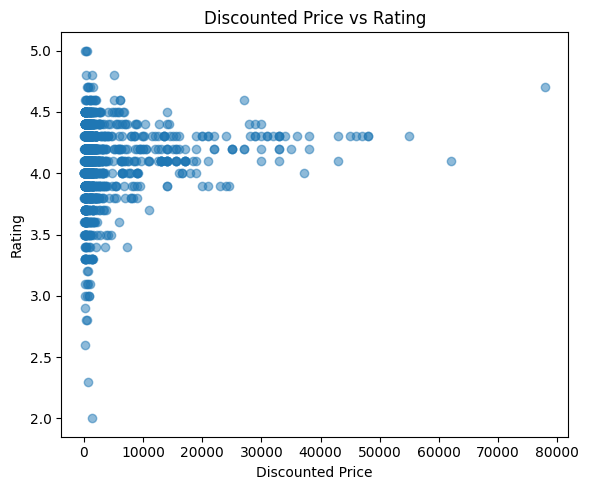

In [33]:
# Q8. Correlation between discounted_price and rating

corr_value = df['discounted_price_num'].corr(df['rating_num'])
print(f"Correlation between discounted_price and rating: {corr_value:.4f}")

# Visualize with a scatter plot
plt.figure(figsize=(6,5))
plt.scatter(df['discounted_price_num'], df['rating_num'], alpha=0.5)
plt.title('Discounted Price vs Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

## Q9. What are the Top 5 categories based on the highest ratings?

In [34]:
# Q9. Top 5 categories based on highest average ratings

avg_rating_by_cat = (
    df.groupby('main_category')['rating_num']
      .mean()
      .sort_values(ascending=False)
)

top5_categories = avg_rating_by_cat.head(5)
print("Top 5 categories by average rating:")
top5_categories

Top 5 categories by average rating:


,rating_num
main_category,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749


## Q10. Identify any potential areas for improvement or optimization based on the data analysis.

### Insights & Potential Areas for Improvement

Based on the analysis above, here are some potential areas for improvement or optimization you can consider (you can extend this section after exploring the outputs):

1. **Category-wise Discount Strategy**  
   - Categories with *lower* average discounts but *lower* ratings could be candidates for better price promotions.  
   - Categories with *very high* discounts but not proportionally higher ratings may indicate that lowering price alone is not enough; product quality, description, or images may need improvement.

2. **Focus on High-Engagement Products**  
   - Products with **very high rating counts** (popular items) should be monitored closely.  
   - You can optimize their titles, images, descriptions and ensure they remain well-stocked because they bring a large share of engagement.

3. **Improve Low-Rated Products**  
   - Identify products (or categories) with **average ratings significantly below the overall mean rating** and:  
     - Read through common review titles/contents for those items.  
     - Address recurring complaints such as build quality, compatibility issues, or misleading descriptions.

4. **Keyword Optimization (SEO)**  
   - The most frequent keywords in product titles (for example, words like *"fast", "charging", "smart", "pro"*) can be used to optimize future product listings.  
   - You can also look for **high-performing keywords** (where products with those words tend to have higher ratings or rating counts).

5. **Price Positioning & Value Perception**  
   - Study the relationship between **discounted price and rating**:  
     - If the correlation is weak (as it often is), it suggests that simply changing the price will not drastically change product ratings.  
     - Focus on **value perception** instead: bundle offers, better packaging, better customer support, etc.

6. **Review Management**  
   - Since some review titles/contents repeat frequently, you can:  
     - Use them as **testimonials** in marketing (for positive reviews).  
     - Use negative but repeated phrases as **signals for product improvement** or expectations mismatch.

Feel free to add more bullet points here after inspecting the actual summary tables and plots in this notebook for your specific dataset.


##4.SPOTIFY EDA

In [35]:
# Setup: Import libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Load the dataset (make sure 'spotify.csv' is in the same directory as this notebook)
df = pd.read_csv('spotify.csv')

# Preview the first few rows
df.head()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [36]:
# Q1: Read the dataframe, check null values and duplicate rows, and handle them

# Basic info about the dataframe
display(df.info())

# Check for null values in each column
print("Null values in each column:")
display(df.isnull().sum())

# Handle null values (here we drop rows with any null values)
df_clean = df.dropna()

# Check for duplicate rows
print("\nNumber of duplicate rows before removing:", df_clean.duplicated().sum())

# Drop duplicate rows
df_clean = df_clean.drop_duplicates()

print("Number of rows after removing nulls and duplicates:", len(df_clean))

# Show a preview of the cleaned dataframe
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


None

Null values in each column:


,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0



Number of duplicate rows before removing: 27
Number of rows after removing nulls and duplicates: 413


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


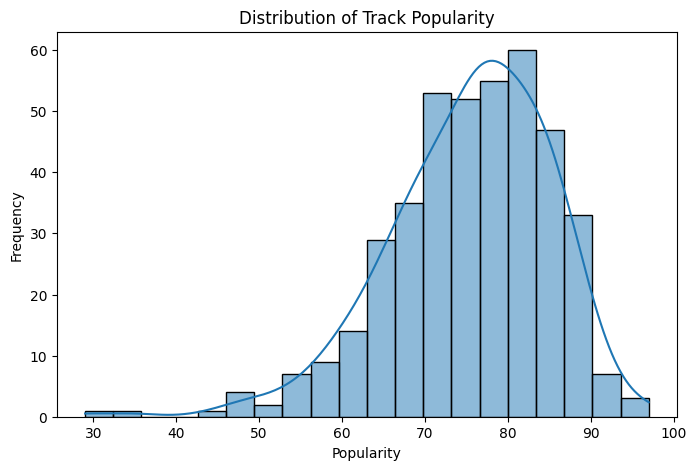

In [37]:
# Q2: What is the distribution of popularity among the tracks in the dataset?
# Visualize it using a histogram

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


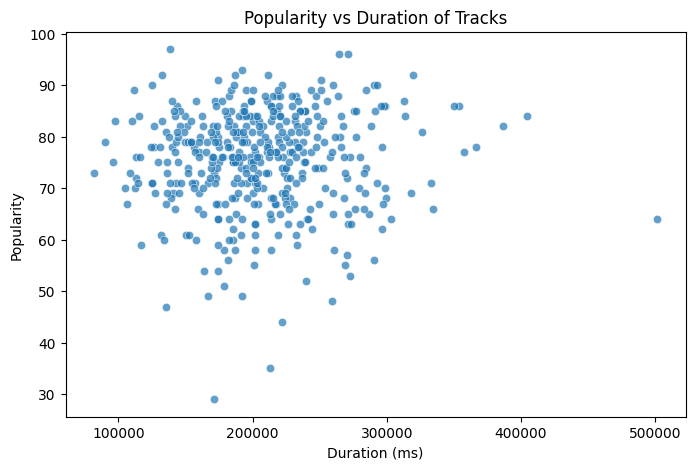

Correlation between Duration (ms) and Popularity: 0.03899200928439096


In [38]:
# Q3: Is there any relationship between the popularity and the duration of tracks?
# Explore this using a scatter plot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='Duration (ms)', y='Popularity', alpha=0.7)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# Optional: Calculate correlation between duration and popularity
correlation = df_clean['Duration (ms)'].corr(df_clean['Popularity'])
print("Correlation between Duration (ms) and Popularity:", correlation)


Track count per artist:


,count
Artist,
Drake,17
Eminem,11
Lil Nas X,10
JAY-Z,10
21 Savage,10
...,...
Lil Tjay,1
BigXthaPlug,1
Fat Joe,1



Artist with the highest number of tracks: Drake


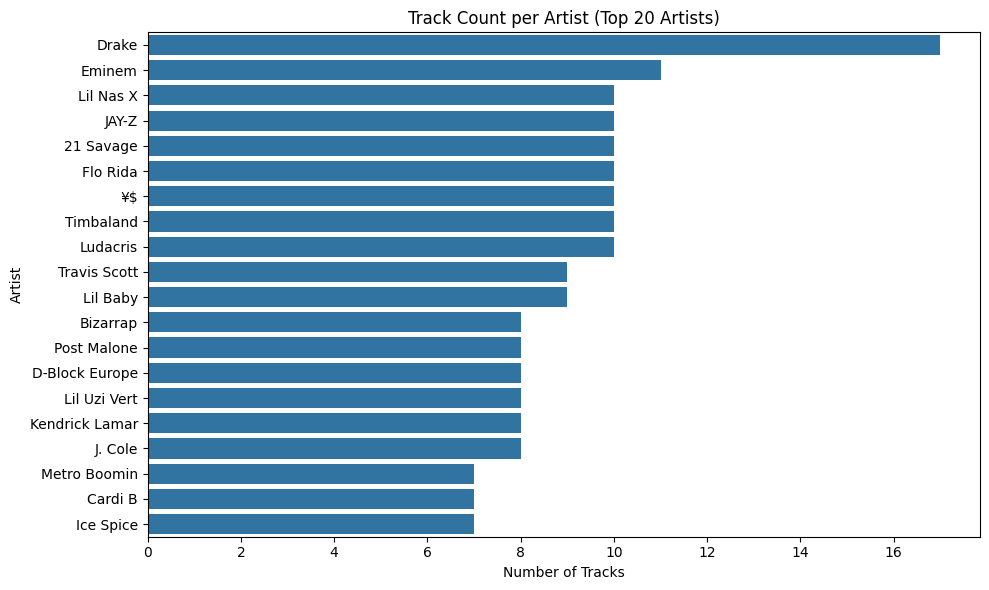

In [39]:
# Q4: Which artist has the highest number of tracks in the dataset?
# Display the count of tracks for each artist using a countplot

# Count tracks per artist
artist_track_counts = df_clean['Artist'].value_counts()
print("Track count per artist:")
display(artist_track_counts)

# Artist with the highest number of tracks
top_artist = artist_track_counts.idxmax()
print("\nArtist with the highest number of tracks:", top_artist)

# Visualize using a countplot (top 20 artists for readability)
top_20_artists = artist_track_counts.head(20).index

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean[df_clean['Artist'].isin(top_20_artists)],
              y='Artist',
              order=top_20_artists)
plt.title('Track Count per Artist (Top 20 Artists)')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


In [40]:
# Q5: What are the top 5 least popular tracks in the dataset?
# Provide the artist name and track name for each

least_popular_tracks = df_clean.sort_values(by='Popularity', ascending=True).head(5)
least_popular_tracks_subset = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]
print("Top 5 least popular tracks:")
display(least_popular_tracks_subset)


Top 5 least popular tracks:


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [41]:
# Q6: Among the top 5 most popular artists, which artist has the highest popularity on average?
# Calculate and display the average popularity for each artist

# Calculate average popularity per artist
artist_avg_popularity = df_clean.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average popularity per artist:")
display(artist_avg_popularity)

# Select top 5 most popular artists by average popularity
top_5_artists = artist_avg_popularity.head(5)
print("\nTop 5 most popular artists by average popularity:")
display(top_5_artists)

# Artist with highest average popularity among the top 5
top_artist_avg = top_5_artists.idxmax()
print("\nArtist with the highest average popularity among the top 5:", top_artist_avg)


Average popularity per artist:


,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000
...,...
RAYE,55.000000
Wyclef Jean,54.500000
Arizona Zervas,54.000000



Top 5 most popular artists by average popularity:


,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000



Artist with the highest average popularity among the top 5: cassö


In [42]:
# Q7: For the top 5 most popular artists, what are their most popular tracks?
# List the track name for each artist

# Reuse the top 5 artists identified earlier
top_5_artist_names = artist_avg_popularity.head(5).index

# Filter dataframe for these top 5 artists
top_artists_df = df_clean[df_clean['Artist'].isin(top_5_artist_names)]

# For each artist, find the track with maximum popularity
most_popular_tracks = (
    top_artists_df.loc[top_artists_df.groupby('Artist')['Popularity'].idxmax(),
                       ['Artist', 'Track Name', 'Popularity']]
    .sort_values(by='Popularity', ascending=False)
)

print("Most popular track for each of the top 5 most popular artists:")
display(most_popular_tracks)


Most popular track for each of the top 5 most popular artists:


,Artist,Track Name,Popularity
260,¥$,CARNIVAL,96
30,Travis Scott,FE!N (feat. Playboi Carti),93
140,cassö,Prada,92
241,Trueno,Mamichula - con Nicki Nicole,89
200,David Guetta,Baby Don't Hurt Me,87


<Figure size 640x480 with 0 Axes>

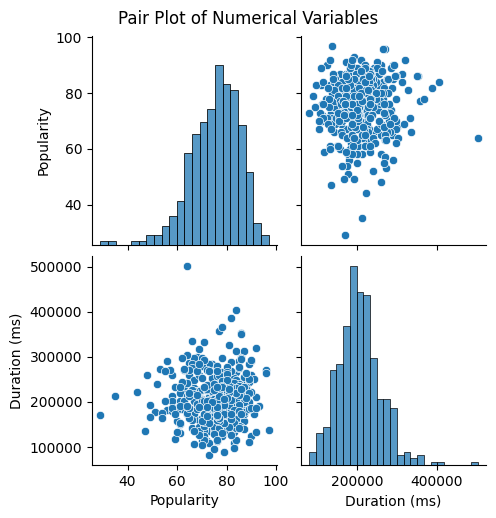

In [43]:
# Q8: Visualize relationships between multiple numerical variables simultaneously using a pair plot

# Select numerical columns for the pair plot
numeric_cols = ['Popularity', 'Duration (ms)']
plt.figure()
sns.pairplot(df_clean[numeric_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


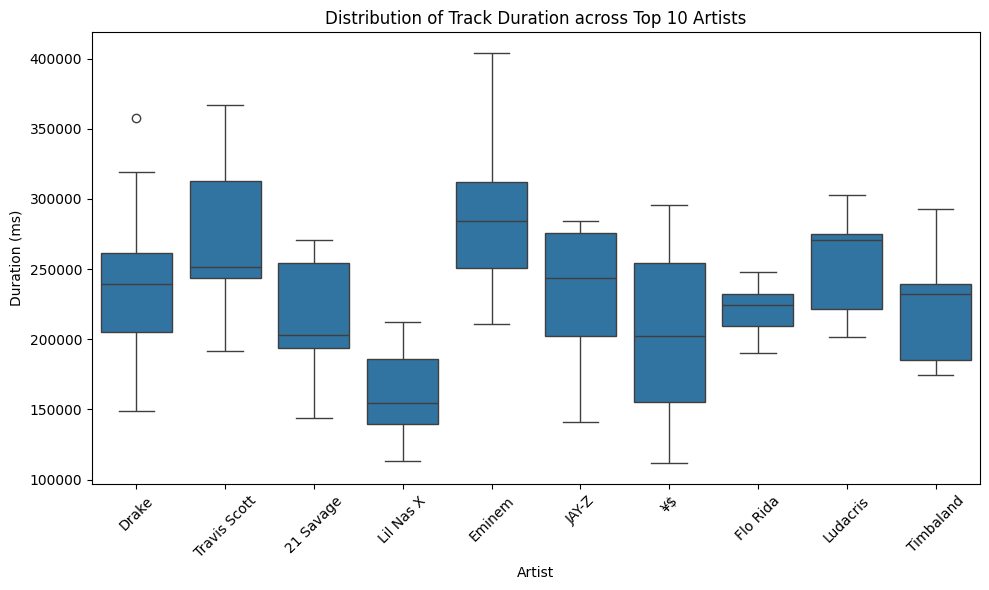

In [44]:
# Q9: Does the duration of tracks vary significantly across different artists?
# Explore this visually using a box plot or violin plot

# For better visualization, consider only the top 10 artists by track count
top_10_artists = df_clean['Artist'].value_counts().head(10).index
duration_top_artists = df_clean[df_clean['Artist'].isin(top_10_artists)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=duration_top_artists, x='Artist', y='Duration (ms)')
plt.title('Distribution of Track Duration across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


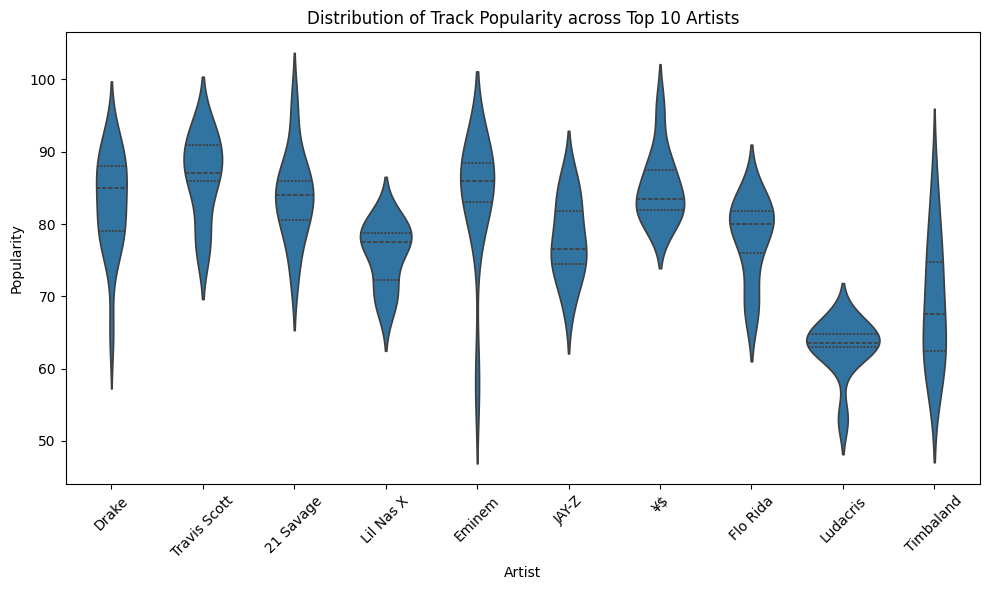

In [45]:
# Q10: How does the distribution of track popularity vary for different artists?
# Visualize this using a swarm plot or a violin plot

# Again, use the top 10 artists by track count for readability
top_10_artists = df_clean['Artist'].value_counts().head(10).index
popularity_top_artists = df_clean[df_clean['Artist'].isin(top_10_artists)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=popularity_top_artists, x='Artist', y='Popularity', inner='quartile')
plt.title('Distribution of Track Popularity across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
